In [22]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

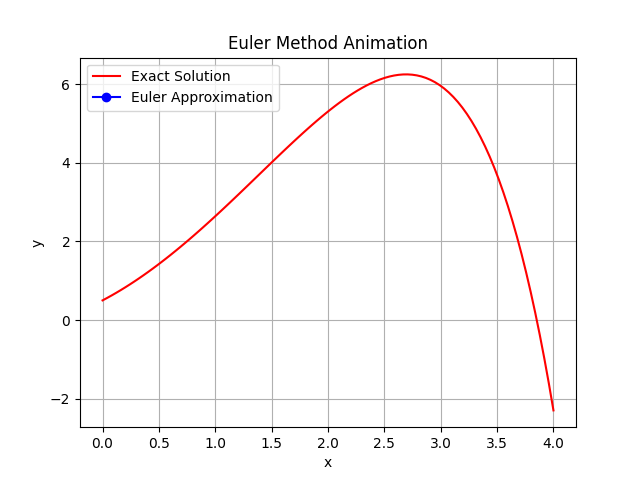

In [26]:
# Define the ODE function f(x, y) = dy/dx
def f(x, y):
    return y-x**2 + 1  # Example: dy/dx = y - x^2 + 1

# Euler's Method
def euler_method(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    x, y = x0, y0
    for i in range(n):
        y = y + h * f(x, y)  # Compute the next y value
        x = x + h            # Compute the next x value
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Initial conditions
x0 = 0  # Initial x value
y0 = 0.5  # Initial y value
h = 0.2  # Step size
n = 20  # Number of steps

# Apply Euler's method
x_values, y_values = euler_method(f, x0, y0, h, n)

def exact(t):
    return (t+1)**2 -0.5 * np.e**t

t_values = np.linspace(x0, x0 + n * h, 100)  # More points for a smoother curve
y_exact=exact(t_values)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.plot(t_values, y_exact, 'r-', label='Exact Solution')
line, = ax.plot([], [], 'bo-', label='Euler Approximation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Euler Method Animation')
ax.legend()
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    # Update the data for the current frame
    x_data = x_values[:frame+1]
    y_data = y_values[:frame+1]
    line.set_data(x_data, y_data)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(x_values), init_func=init, blit=True, repeat=False)

# Show the animation
plt.show()